# Social Media Analysis through the Twitter API

This detailed video course is available at  https://codingwithmax.teachable.com/courses/ . The course name is "Conquer Social Media through the Twitter API". 

Note:coded in python 3.0.
Remember to run it step-by-step. As the tutorial is in one flow.
In every step some of the code is changed. To track the change code look for the comment "###change####" and then follow below that line.

This is basic level tutorial for those we want some analysis on twitter data. this will give you the practical idea of how can you play with different API's to extract your data from twitter.
This tutorial covers below lectures:

1) sending first request to Twitter API

2) Getting Tweets from Specific time

3) Getting all tweets by moving backward in time

4) Filtering for english tweets and picking keywords

5) Identifying relevant tweets and keeping track of data

6) Plotting the mined data from twitter

7) Adjusting the maximum time and adding ticks to the graph

8) Streaming live twitter data

These libraries required in this tutorial can be found at these links.

http://docs.python-requests.org/en/master/

https://github.com/requests/requests-oauthlib

https://github.com/bear/python-twitter

To know more about installing python packages Please click on below link

https://packaging.python.org/tutorials/installing-packages/

### Sending first request to Twitter API
First we will import the required libraries. Then we will make our URL query for sending it to the user. Authentication is required to access server and forward your query so that the server can give you back something. Four types of secret codes are required for authentication process. These secret codes can be obtained by creating app on https://apps.twitter.com/. To create app on twitter click on the link. These secret code can be obtained by first logging in to your twitter account.
After getting those codes we set make our authention variable with the help of request_oauth library. Both URL and authentication is passed as request to server.if everything goes well the server respond to us and gives us the information requested against the  query in the URL. 


In [3]:
#allow us to send HTTP msg to twitter api
import requests

#allow us to send the authentication with the request
import requests_oauthlib as ra

#here in query variable we are setting what we want to send to server
query="earthquake"
#looking for the tweets contaning word stored in query
URL= ("https://api.twitter.com/1.1/search/tweets.json?q="+query)

In [5]:
#we get these credentials when we create an app on twitter
twitter_consumer_key="XXXXXXXXXXXXXXXXXXXXXXXXXX"
twitter_consumer_secret="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

twitter_access_token="XXXXXXXX-XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
twitter_access_secret="XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"


#setting our authentication to pass it with the request
authen= ra.OAuth1(twitter_consumer_key,twitter_consumer_secret,twitter_access_token,twitter_access_secret)



Request allow us to send HTTP request. we send get request which contain URL and authentication.
so here we are sending query of "earthquake".
After sendng the request the twitter will give us back the latest tweets containing keyword "earthquake"
if the print statement gives response 200 it means everthing is perfectly working. if response is 401 it means something is wrong with authentication keys. basically 400 response means something is wrong on your side. 500 response means something is wrong on server side. To know more about the response click on this link
http://www.restapitutorial.com/httpstatuscodes.html


In [30]:
backresponse=requests.get(URL,auth=authen)

print(backresponse)

<Response [200]>


## Dealing with Data Recieved in Response
Here we will discuss that what kind of data we get back in response and how can we parse the data to get our required data.

The response which we get is in JSON format. lets print it and have a look at it.
it contains alot of information including the tweet text, time, profile information, hashtag used, retweet information etc.
the data is in form of dictionary and arrays. 

In [31]:
print(backresponse.json())

{'statuses': [{'created_at': 'Thu Feb 08 19:51:16 +0000 2018', 'id': 961688901227200512, 'id_str': '961688901227200512', 'text': '【極微小地震速報 京都府6/66】\n2018/02/09 4:25:26 JST, \n日本 京都府 亀岡市役所の南西3km, \nM0.9, TNT337.6g, 深さ10.6km, \nMAP https://t.co/beE0870td6 1413', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/beE0870td6', 'expanded_url': 'http://maps.google.co.jp/maps?f=q&hl=ja&geocode=&q=34.9974,135.5518&ie=UTF8&ll=34.9974,135.5518&z=6', 'display_url': 'maps.google.co.jp/maps?f=q&hl=ja…', 'indices': [96, 119]}]}, 'metadata': {'iso_language_code': 'ja', 'result_type': 'recent'}, 'source': '<a href="http://www.twitter.com/" rel="nofollow">earthquake_allhypo</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 384889871, 'id_str': '384889871', 'name': '全地震速報①🐾', 'screen_name': 'earthquake_all', '

### Number of tweets to retrieve
Keep in mind that we can extract upto 100 in single get request.Above data may contains information of multiple tweets. lets retrieve only one tweet so that we can futher study what type of information it contains. To notify the number of tweets we want to retrive in single request we will send parameter "count" in our URL to the server.

In [32]:
query="earthquake"

####changes#####

#the count variable will control the number if tweets we want to retieve, here we will set it to 1.
count="1"
#looking for sigle tweet contaning word stored in query
URL= ("https://api.twitter.com/1.1/search/tweets.json?q="+query+"&count="+count)

###below is the same code which we have earlier used#####

authen= ra.OAuth1(twitter_consumer_key,twitter_consumer_secret,twitter_access_token,twitter_access_secret)
backresponse=requests.get(URL,auth=authen)

print(backresponse.json())

{'statuses': [{'created_at': 'Thu Feb 08 19:51:56 +0000 2018', 'id': 961689071138488320, 'id_str': '961689071138488320', 'text': 'RT @LBNLcs: .@Livermore_Lab &amp; @BerkeleyLab scientists used @NERSC #supercomputers to model ground shaking for a magnitude 7.0 #earthquake o…', 'truncated': False, 'entities': {'hashtags': [{'text': 'supercomputers', 'indices': [70, 85]}, {'text': 'earthquake', 'indices': [130, 141]}], 'symbols': [], 'user_mentions': [{'screen_name': 'LBNLcs', 'name': 'Berkeley Lab CS', 'id': 128356652, 'id_str': '128356652', 'indices': [3, 10]}, {'screen_name': 'Livermore_Lab', 'name': 'LLNL', 'id': 41806795, 'id_str': '41806795', 'indices': [13, 27]}, {'screen_name': 'BerkeleyLab', 'name': 'Berkeley Lab', 'id': 17054817, 'id_str': '17054817', 'indices': [34, 46]}, {'screen_name': 'NERSC', 'name': 'NERSC', 'id': 16337846, 'id_str': '16337846', 'indices': [63, 69]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="https:/

### Extracting tweet text and other information
Now we will go deep into dictionary and extract the text of tweet. we can extract any type of information related to this tweet. Here we will extraxt the tweet text, hastags and id of the tweet.


In [34]:
#######below is the same code which we have earlier used#####

query="earthquake"
count="1"
URL= ("https://api.twitter.com/1.1/search/tweets.json?q="+query+"&count="+count)

authen= ra.OAuth1(twitter_consumer_key,twitter_consumer_secret,twitter_access_token,twitter_access_secret)
backresponse=requests.get(URL,auth=authen)
tweetInformation=backresponse.json()

###changes###

###getting Tweet####
# we get Array against the key "statuses", then in that array we extracted the dictionary at zero index and then further
#in that dictionary we searched for value against the key "text".
tweet = tweetInformation["statuses"][0]["text"]
print(tweet)

####Getting HashTags#####
#to get hashtag we get Array against the key "statuses", then in that array we extracted the dictionary at zero index and then further
#in that dictionary we searched for value against the key "entities" then further went deep to get array against key "hashtags" then 
#took the zero index of that Array and find against the key "text"
hashtagsArray= tweetInformation["statuses"][0]["entities"]["hashtags"]
#to confirm whether there are hashtags or not we will further check whether the array contain something or its empty
if (len(hashtagsArray)>0):
    hastags=hashtagsArray[0]["text"]
    print(hashtags)
else:
    print("No hastags found")
    
### Getting Tweet id####
#every tweet has its own unique id
id=tweetInformation["statuses"][0]["id"]

print(id)

RT @angiestarr: Feb 9, 1971 a 6.7 earthquake struck So Cal; I vividly remember this one. My family lived approx 15 miles from the hardest h…
No hastags found
961689490195546112


### Tweet between specific interval of time
we will insert "since" and "until" in the url to get tweet of specific time interval. 

In [35]:

#######below is the same code which we have earlier used#####
query="eartquake"
count="1"

####changes######

#in since variable we are storing the date from where exatcly we want to start
since="2018-02-05"
#in untill variable we are storing ending date or the date untill we want to extract
until="2018-02-08"
#Looking for tweets between the specified interval
URL= ("https://api.twitter.com/1.1/search/tweets.json?q="+query+"&since="+since+"&until="+until+"&count="+count)

#######below is the same code which we have earlier used#####

authen= ra.OAuth1(twitter_consumer_key,twitter_consumer_secret,twitter_access_token,twitter_access_secret)
backresponse=requests.get(URL,auth=authen)
tweetInformation=backresponse.json()
print(tweetInformation)


{'statuses': [{'created_at': 'Wed Feb 07 20:26:02 +0000 2018', 'id': 961335265041272832, 'id_str': '961335265041272832', 'text': '#Corrupcion #SinAmorAlProjimo #FamiliaDestruidas #Eartquake #Tsunami #SeñalesEnElCielo #Apostasia #Idolatria… https://t.co/hqa6HT9nLP', 'truncated': True, 'entities': {'hashtags': [{'text': 'Corrupcion', 'indices': [0, 11]}, {'text': 'SinAmorAlProjimo', 'indices': [12, 29]}, {'text': 'FamiliaDestruidas', 'indices': [30, 48]}, {'text': 'Eartquake', 'indices': [49, 59]}, {'text': 'Tsunami', 'indices': [60, 68]}, {'text': 'SeñalesEnElCielo', 'indices': [69, 86]}, {'text': 'Apostasia', 'indices': [87, 97]}, {'text': 'Idolatria', 'indices': [98, 108]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/hqa6HT9nLP', 'expanded_url': 'https://twitter.com/i/web/status/961335265041272832', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [110, 133]}]}, 'metadata': {'iso_language_code': 'pt', 'result_type': 'recent'}, 'source': '<a href="http:/

### we have already seen that max_id is unique id of every tweet. so can we get all the tweets before or after that id
we will make changes to the url which we are sending in our request. we will include max_id parameter in the url.

In [36]:

#######below is the same code which we have earlier used#####
query="earthquake"
count="100"
since="2018-02-05"

####changes####

#in max_id we are storing id of the ending tweet
max_id='961335265041272832'
#Looking for tweets between the starting time and maximum tweet id
URL= ("https://api.twitter.com/1.1/search/tweets.json?q="+query+"&since="+since+"&max_id="+max_id+"&count="+count)

#######below is the same code which we have earlier used#####

authen= ra.OAuth1(twitter_consumer_key,twitter_consumer_secret,twitter_access_token,twitter_access_secret)
backresponse=requests.get(URL,auth=authen)
tweetInformation=backresponse.json()
print(tweetInformation)


{'statuses': [{'created_at': 'Wed Feb 07 20:26:00 +0000 2018', 'id': 961335257742983168, 'id_str': '961335257742983168', 'text': 'RT @Consaneko: 日本人のみなさんへ。台南地震へ募金なんかするより、台南人がもっと喜ぶ応援方法を台南在住のぼくは伝えたい https://t.co/FFBbLQ39zu @Maechan0502さんから', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Consaneko', 'name': 'しゅんちゃま', 'id': 67791034, 'id_str': '67791034', 'indices': [3, 13]}, {'screen_name': 'Maechan0502', 'name': 'まえちゃん @ワーホリ電子書籍発売中', 'id': 139710026, 'id_str': '139710026', 'indices': [91, 103]}], 'urls': [{'url': 'https://t.co/FFBbLQ39zu', 'expanded_url': 'https://maeharakazuhiro.com/taiwan-earthquake-message/', 'display_url': 'maeharakazuhiro.com/taiwan-earthqu…', 'indices': [67, 90]}]}, 'metadata': {'iso_language_code': 'ja', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': 

### Getting all tweets by moving backward in time
As we have seen above that we can extract only 100 tweets in one request. Now we want to change our URL information dynamically so that we can extract all the tweets in a time frame. we will get the id of the last tweet in 100 tweet bundle and then again send a new request to server with this new information. In that way we will move backward in time to extract 100 tweets each time. The while loop will go on untill we have nill information response. Inside the while loop there is for loop. This for loop is used for unpacking the 100 tweets package and extract all the the 100 tweets from that json response.

In [37]:
###below is the same code in earlier step###
query="earthquake"
count="100"
since="2018-02-05"
max_id='961335265041272832'
URL= ("https://api.twitter.com/1.1/search/tweets.json?q="+query+"&since="+since+"&max_id="+max_id+"&count="+count)

authen= ra.OAuth1(twitter_consumer_key,twitter_consumer_secret,twitter_access_token,twitter_access_secret)
backresponse=requests.get(URL,auth=authen)
tweetInformation=backresponse.json()


###changes###

## the loop will go on untill we have nill information in json i.e no tweets
while (len(tweetInformation)!=0):
    #getting the information against key "statuses" from the json response
    alltweets=tweetInformation["statuses"]
    #As we have set count to 100 so this loop will give us all the tweets we get in a single get request
    for eachtweet in range(len(alltweets)):
        #accessing tweets same as above 
        tweet = alltweets[eachtweet]["text"]
        print(tweet)
        #accessing id
        max_id=alltweets[eachtweet]["id_str"]
        print(max_id)
    
    #we want to print date and time of every 100th tweet    
    print(alltweets[eachtweet]["created_at"])    
    #dynamically changing our URL
    URL= ("https://api.twitter.com/1.1/search/tweets.json?q="+query+"&since="+since+"&max_id="+max_id+"&count="+count)
    #inserted the try and except block so that our program does not give an error, if their is something wrong it will break the
    #loop and end the program.
    try:
        #sending get request with new id
        backresponse=requests.get(URL,auth=authen)
        #gettng the new json data of the new request
        tweetInformation=backresponse.json()
    except:
        break
        

RT @Consaneko: 日本人のみなさんへ。台南地震へ募金なんかするより、台南人がもっと喜ぶ応援方法を台南在住のぼくは伝えたい https://t.co/FFBbLQ39zu @Maechan0502さんから
961335257742983168
Rescuers scramble to find survivors after earthquake kills 7 in Taiwan https://t.co/4uhJTZr8h9 https://t.co/o8yBXDVz7k
961335211928768518
#UK: Rescuers search for survivors after Taiwan earthquake https://t.co/fxl8TWHOLS
961335185437593600
RT @foxnewsalert: 2 killed, more than 140 injured after 6.4 magnitude earthquake strikes Taiwan's coast https://t.co/ZCwe3oy1mG
961335178261020672
被害は大きくないというツイートも見かけますが、どうなんでしょう？よくわからない…

Taiwan earthquake: Series of powerful aftershocks hit Hualien https://t.co/oH8c9C2hwn
961335177925550080
RT @pinkpinta13: https://t.co/YQbB6h3a1j
961335140130656256
RT @TuiteroSismico: Nuevo Sismo en Taiwán ahora de 5.8 a solo 5 km de profundidad #earthquake #taiwan #temblor 
Haz #RT https://t.co/h7sIP0…
961335127015084032
RT @O2ej87Nu4PgDTYK: れたぽ商店でも義援金箱作ろうかなと思ったけど、とりまペンディング。
よし！１年後に台南へ行こう^^
レターポットで繋がった誰かと♪

#台湾地震　#台湾加油　

日本人のみなさんへ。台南地震へ募金

RT @HuffPost: A magnitude 6.4 earthquake struck just to the northeast of the city of Hualien in Taiwan late on Tuesday, the U.S Geological…
961333800704753664
RT @Consaneko: 日本人のみなさんへ。台南地震へ募金なんかするより、台南人がもっと喜ぶ応援方法を台南在住のぼくは伝えたい https://t.co/FFBbLQ39zu @Maechan0502さんから
961333798792081408
RT @channeltennews: Up to seven people have died and over 60 are missing after a 6.4 magnitude earthquake struck a coastal city in Taiwan.…
961333779062185984
DAUM'da liyakat tartışması: 'Antartika'ya deprem istasyonu kuran kişiyim' 
#DAUM
#deprem
#earthquake
#geophysics… https://t.co/u0ZSPaZSm8
961333778210807811
RT @Cernovich: "The ten Americans detained in Haiti for trying to take 33 children out of the country after the earthquake, were charged wi…
961333772040982529
PM Harris expresses condolences and support for the Republic of China (Taiwan) after powerful 6.4 earthquake https://t.co/GXWdacsgVP
961333763228741632
RT @NYCityAlerts: BREAKING NEWS. A 2.2 magnitude earthquake was reported this morning 

@AstralPlumbing @GasChatGroup Earthquake I recon.
961332252566224896
Another earthquake tonight in Hualien, hope everyone in Taiwan is okay 😔 #PrayForTaiwan ❤
961332244609630208
RT @cnnbrk: Rescuers are working nonstop at a tilted building where dozens may be trapped after Tuesday's earthquake in Hualien, Taiwan htt…
961332243745538048
Up to seven people have died and over 60 are missing after a 6.4 magnitude earthquake struck a coastal city in Taiw… https://t.co/x4xnsMOKSJ
961332241832935424
RT @EdKrassen: BREAKING: Billionaire investor Carl Icahn says that these stock market swings that we are seeing are the "beginnings of a ru…
961332175911071744
RT @EXOVotingSquad: We are sorry to hear about the earthquake in Taiwan.
Pray that everyone and their family members are safe.

Our prayers…
961332161805561856
7 dead, 260 injured after major 6.4 earthquake hits Taiwan's east coast https://t.co/YhVtFp5kMh @BI_Europe
961332131837300736
RT @ChinaDailyUSA: The Chinese mainland is willing to se

A fashion showcase and informational event will be held February 15th in appreciation of the recent fund raising... https://t.co/JYMLZUXqk6
961330594981400576
RT @siame_risingsun: Dear Taiwan,

We Japanese never forget all your supports during the Great East Japan Earthquake in March 2011. Now it’…
961330587603750912
Rescuers scramble to find dozens of people trapped after earthquake in Taiwan https://t.co/wRS2It0CeQ
961330581865975816
【地震情報】 2018年02月08日 04時35分

#奄美大島北西沖 でM2.7の地震。  震源 28.1N 128.1E  深さ 13.4km  沖永良部島から 100.0km #地震 #地殻変動 #earthquake https://t.co/ruPT5GTudo
961330578346803200
【微小地震速報】
2018/02/08 4:54:19 JST, 
アメリカ合衆国 ネバダ リノの南東171km, 
ML1.0, TNT476.9g, 深さ2.7km, 
https://t.co/YVX4s1EL2j
961330560374157312
RT @QuakesToday: 4.6 magnitude #earthquake. 115 km from Shikotan, Sakhalin, #Russia https://t.co/oTE39v0ESr
961330539180576768
RT @HistoricAlexVA: Today in 1812, 7.7 magnitude aftershock of New Madrid earthquake rattled windows in Alexandria. @AlexHistorical #ALXDay…
961330

Taiwan was hit by an earthquake of 5.7 magnitude on the eastern coast of the island, the government said late on... https://t.co/VKqec6fV0Q
961329276963446789
RT @QuakesToday: 4.2 magnitude #earthquake. 89 km from Acarí, Arequipa, #Peru https://t.co/85GGIO6dFa
961329263843651584
20:02 Last UK Earthquake Mon, 05 Feb 18 15:32:46 GMT; Location:  ; Lat/long: 57.051,-5.791;  Magnitude: 1.8
961329228456247296
RT @QuakesToday: 3.3 magnitude #earthquake. 60 km from Culebra, #Culebra, Puerto Rico https://t.co/JtrC6eWuwH
961329181727641602
RT @Cernovich: "The ten Americans detained in Haiti for trying to take 33 children out of the country after the earthquake, were charged wi…
961329163780141056
@EarthQuake_HK15 😂
😊
😘
It was a good picture!
961329157513891841
RT @OaxacanewsENG: 5 months after the earthquake: only 1 of every 20 houses has been rebuilt in the Isthmus #Oaxaca (ESP) https://t.co/VxZ1…
961329151255998464
RT @FoxNews: A residential building leans on a collapsed first floor following 

RT @BNONews: 5.7-magnitude earthquake shakes northeast Taiwan, nearly 24 hours after a strong earthquake hit the same area - CWB
961328035537604609
RT @khanSaahira: 25 million children in #Pakistan between the ages of 5 and 16 years are out of school. What is the point of recognising Ri…
961327998229274624
RT @CGTNOfficial: #ChinaToday In case you missed it:
- China, Netherlands to enhance ties under BRI https://t.co/l7mlyvlooc
- 6 people conf…
961327965861793792
USGS reports a M1 #earthquake 24km S of Hawthorne, Nevada on 2/7/18 @ 19:54:19 UTC https://t.co/l8gER3zUMY #quake
961327964632711168
Taiwan earthquake: Devastating images from the aftermath https://t.co/IrScdxbUh5 via @YouTube
961327963798196225
RT @ottocrat: 16%!!! The 2011 earthquake and tsunami caused a 3.5% GDP hit to Japan - Brexit is worse - much, much worse - than a serious n…
961327944563032065
1.0 earthquake occurred near Khameneh, East Azarbaijan at 19:35 UTC! #earthquake #Khameneh https://t.co/01qcfdcXbw
96132792883

RT @JOSEPHEICHER: Magnitude-6.4 earthquake rocks Taiwan @CNN https://t.co/aQ0Hp59YDr
961326510098599936
RT @StormchaserUKEU: Shocking images of the after affects of the 6.4 magnitude #Earthquake that hit the east coast of #Taiwan, Asia yesterd…
961326502364278784
@micahdiele Dude real shit: Taiwan just had an earthquake. Philippines and Mexico have had volcanic eruptions. Coup… https://t.co/OVfWmDME2W
961326498853535744
RT @Naturehazard: Six dead, 76 missing as rescue operations continue after earthquake hits Taiwan https://t.co/arEdxmTeof
961326447645417472
RT @StBensMonastery: Join us in praying for the country of #Taiwan, which experienced a devastating earthquake yesterday evening. Pray for…
961326440300953600
【極微小地震速報 愛知県2/56】
2018/02/08 4:17:27 JST, 
日本 愛知県 岡崎市役所の東12km, 
M0.7, TNT169.2g, 深さ31.3km, 
MAP https://t.co/fFBelCt8el 1437
961326421384691712
RT @Consaneko: 日本人のみなさんへ。台南地震へ募金なんかするより、台南人がもっと喜ぶ応援方法を台南在住のぼくは伝えたい https://t.co/FFBbLQ39zu @Maechan0502さんから
961326406377459712
RT @t

RT @MorningExp: At least 7 dead, dozens feared trapped in Hualien, Taiwan after 6.4 earthquake topples buildings: https://t.co/W9kj9BwPoU h…
961325318928781312
RT @justin_fenton: Earthquake going through the Baltimore police force after this message blasted out by union about city no longer coverin…
961325309630078979
@sheneshaban_ Pretty sure there wasn’t any earthquake yesterday
961325309365817346
RT @cnnbrk: Rescuers are working nonstop at a tilted building where dozens may be trapped after Tuesday's earthquake in Hualien, Taiwan htt…
961325298536116225
RT @justin_fenton: Earthquake going through the Baltimore police force after this message blasted out by union about city no longer coverin…
961325284359331840
RT @cnnbrk: Rescuers are working nonstop at a tilted building where dozens may be trapped after Tuesday's earthquake in Hualien, Taiwan htt…
961325281733763073
RT @cnnbrk: Rescuers are working nonstop at a tilted building where dozens may be trapped after Tuesday's earthquake 

I liked a @YouTube video https://t.co/fkIpYlvaFF Taiwan earthquake: Devastating images from the aftermath
961324483901640704
【小地震速報】
2018/02/08 4:08:59 JST, 
ホンジュラス テグシガルパの南西193km, 
M3.5, TNT2.7トン, 深さ49.0km, 
https://t.co/OmV0cFOfRr
961324483347759104
Rescuers are working nonstop at a tilted building where dozens may be trapped after Tuesday's earthquake in Hualien… https://t.co/LKvaCVI62S
961324465400500224
Our earthquake article now in Pubmed 
https://t.co/Ge5nymnRRX
961324464674869248
Rescuers are working nonstop at a tilted building where dozens may be trapped after Tuesday's earthquake in Hualien… https://t.co/gtGV8HtsKF
961324440750575616
Solar wind was steady, Solar flare was on flames, Cosmic rays falling when Earthquake M 5.8 hit
7 February 2018, co… https://t.co/SKPBkDr3tf
961324434303930373
Christians have so much to answer for: "Why it's gotten harder for LGBT people in Haiti since the earthquake."… https://t.co/RqWxJyESw0
961324376368013312
RT @PaulNunn: Dramatic picture o

RT @WBTreasurer: "Helping our client manage risk and build resilience against natural disasters is a strategic priority for the World Bank.…
961322947163062272
RT @WilliamPacaElem: Second graders build cities in coorperative groups and then examine the effects of an earthquake during their science…
961322917647867904
Look Linda Crawford finally!! Let's see how long it takes the U.S. media #westandalone #noworldnews https://t.co/Vfac9IHi5P
961322911020802048
RT @Gameofthebest: 日本人のみなさんへ。台南地震へ募金なんかするより、台南人がもっと喜ぶ応援方法を台南在住のぼくは伝えたい https://t.co/s0Jm988tcI
961322893912125440
【微小地震速報 岩手県2/51】
2018/02/08 3:46:52 JST, 
日本 岩手県 釜石市役所の東南東50km, 
M1.7, TNT5.4kg, 深さ26.3km, 
MAP https://t.co/GK39ncPxmJ 1429
961322877533413376
"Helping our client manage risk and build resilience against natural disasters is a strategic priority for the Worl… https://t.co/RXtCGo0JGX
961322847607181312
RT @cnni: Dozens of people are missing following a deadly magnitude-6.4 earthquake in Taiwan that killed at least seven 

RT @TTremblingEarth: Dashcam in Taiwan captures a rockfall at the moment of tonight's 6.4 earthquake... seconds later you hear the emergenc…
961321421963186176
RT @NDisaster_Newz: Feel It? Minor #Earthquake Rattles NY's Westchester County https://t.co/oCFiBhYc8w https://t.co/Oc4Zjbyf6I
961321387938996224
https://t.co/tGLiwK3Sob https://t.co/VO04SaJRa0
961321384700936192
RT @Rec7Media: #Taiwan #TaiwanEarthquake  #news #BreakingNews #WednesdayWisdom #ohiowx #GainWithXtianDela #GainWithPyeWaw #GainYourWay #Gai…
961321373883756544
【極微小地震速報 島根県1/48】
2018/02/08 3:26:52 JST, 
日本 島根県 奥出雲町役場の東12km, 
M0.5, TNT84.8g, 深さ3.9km, 
MAP https://t.co/jfWbjsNTT5 1434
961321348059443200
Taiwan earthquake leaves tall building on dangerous lean – video https://t.co/Zu4hP0q4Fs
961321345622700032
RT @TIME: At least 6 people dead and 76 still missing after massive earthquake hits Taiwan https://t.co/q4upVZTvvc
961321341965291522
6 dead, 76 missing after strong #Earthquake hits #Taiwan
https://t.co/OZz16boQki
9

緊急地震速報。地震発生。 04:27:28 震度0未満 宮城県 気仙沼 南三陸 #地震
#地震速報
#earthquake
#bot_touhou_eq
961320671279120384
緊急地震速報。地震発生。 04:27:28 岩手県 藤沢 大東 予想震度0 #地震
#地震速報
#earthquake
#bot_touhou_eq
961320669827891200
RT @TW_nextmedia: 花蓮強震第二夜，災民累翻收容所熟睡.....
#台湾 #台灣 #Taiwan #花蓮 #強震 #earthquake #台湾地震 #台湾の地震 #台湾 #taiwanearthquake #PrayForTaiwan
https://t.co…
961320645383536640
RT @iaeaorg: How do you know a building is safe &amp; won’t collapse after an #earthquake? After a 7.1 magnitude quake in #Mexico, #nuclear sci…
961320634746781696
RT @ABC: At least four buildings in Hualien, Taiwan have collapsed and one bridge has been damaged following magnitude-6.4 earthquake, Taiw…
961320613167198209
RT @LSLStarch66: #PrayForTaiwán🙏🏻😞
At least four buildings in Hualien, Taiwan have collapsed and one bridge has been damaged following magn…
961320601137926144
【微小地震速報 福島県8/45】
2018/02/08 3:03:57 JST, 
日本 福島県 相馬市役所の北4km, 
M1.5, TNT2.7kg, 深さ28.6km, 
MAP https://t.co/yXiK51gEdT 1431
961320592900149248
RT @NewEarthquake: 5.7 ea

RT @shahid28576: #Taiwan : Multi storey #hotel collapses in Taiwan 🇹🇼 after the eastern part hit by magnitude 6.6 #Earthquake .... https://…
961319438858498048
RT @justin_fenton: Earthquake going through the Baltimore police force after this message blasted out by union about city no longer coverin…
961319404314202114
RT @cnni: Dozens of people are missing following a deadly magnitude-6.4 earthquake in Taiwan that killed at least seven people and injured…
961319404180000770
RT @valentinasando6: Earthquake in Taiwan collapsed a hotel, leaving people within inside (by @nytimes): https://t.co/lLZlJ0vqAE
961319378053611521
Light earthquake 4.5 mag, 273 km SE of Lambasa, Fiji - https://t.co/BxNPhWQcJp #earthquake #quake
961319367790100480
"Clinton Cash": Haiti Earthquake Helped To Enrich The Clintons - Bret Ba... https://t.co/AqFujgLf7d via @YouTube
961319356444610564
RT @wikisismos: #SISMO  M 5.4, Taiwan https://t.co/dFdUzt7Ryx #earthquake #quake #jishin https://t.co/sIB345rjKn
96131935307

RT @EMSC: #Earthquake (#sismo) M2.2 strikes 27 km N of New City (New York) 1hr 8min ago. More info: https://t.co/1ZguPTAGvW
961318011662716928
A murder concealed in the chaotic aftermath of an earthquake
~ THE JANUS ~
https://t.co/OvHjKIjtL8 
#mystery… https://t.co/n4OpyGwGxq
961318010790260736
RT @CNN: Dozens of people are missing following a deadly earthquake in Taiwan. The magnitude 6.4 quake struck 13 miles north of the city la…
961318009913659392
RT @TW_nextmedia: 神魔之塔修改登入畫面「台灣加油」，捐款300萬揪感心.....
#台湾 #台灣 #Taiwan #花蓮 #強震 #earthquake #台湾地震 #台湾の地震 #台湾 #taiwanearthquake #PrayForTaiwan
→→…
961318008340733952
CNN 報導台灣花蓮地震災情 Earthquake Magnitude 6.4 hits Taiwan https://t.co/PckomV3YcD
961318003898966016
#Taiwan #earthquake: Five killed, 247 injured as emergency responders struggle to locate the dozens missing as of now.
961317975407050752
RT @CessoKay: When life throws a storm.. then comes the earthquake, followed by a landslide.. then finally a hurricane crashes in.. and yet…
96131796482

RT @justin_fenton: Earthquake going through the Baltimore police force after this message blasted out by union about city no longer coverin…
961316863962697728
RT @Consaneko: 日本人のみなさんへ。台南地震へ募金なんかするより、台南人がもっと喜ぶ応援方法を台南在住のぼくは伝えたい https://t.co/FFBbLQ39zu @Maechan0502さんから
961316856861679616
RT @iran_policy: #Iran: Several Earthquake Victims in #Kermanshah Died Due to Frostbite
The reason for the loss of these people is the igno…
961316855481815040
RT @iran_policy: Sarina lost her life because of cold and lack of housing for earthquake victims in #Kermanshah region
The freezing cold in…
961316837115027456
there was a small earthquake like 45 min north of my crib this morning, wild
961316821998669824
RT @iaeaorg: How do you know a building is safe &amp; won’t collapse after an #earthquake? After a 7.1 magnitude quake… https://t.co/TPZoGJ6NHC
961316782081527809
【極微小地震速報 山梨県1/30】
2018/02/08 2:04:24 JST, 
日本 山梨県 南部町役場の南西18km, 
M0.4, TNT60.0g, 深さ25.7km, 
MAP https://t.co/nZVbeg5RPT 1427
961316776

RT @NewEarthquake: 5.1 earthquake, 273km SE of Lambasa, Fiji. 2018-02-07 06:45:23 at epicenter (17m ago, depth 572km). https://t.co/wOCcy1T…
961315606980169728
USGS:M 4.5 - 273km SE of Lambasa, Fiji https://t.co/6hulFn2i5m #earthquake https://t.co/Y6p4L2sHwj
961315581579292673
M 5.1 - 273km SE of Lambasa, Fiji https://t.co/PQ18Pj2hu3
961315569575211008
M 2.7 - 89km WNW of Skagway, Alaska https://t.co/rAsj9Xz9s7
961315568325296128
M 1.2 - 13km NE of Coachella, CA https://t.co/MY0BdFhFs5
961315567129866240
M 2.0 - 122km SW of Anchor Point, Alaska https://t.co/4cWPbvXl4G
961315565766787072
M 1.1 - 13km NE of Coachella, CA https://t.co/YoOrwJlXJU
961315564164562944
RT @NBCNews: A magnitude 6.4 earthquake struck near the coastal city of Hualien in Taiwan, the U.S. Geological Survey (USGS) said, killing…
961315550633824257
RT @Consaneko: 日本人のみなさんへ。台南地震へ募金なんかするより、台南人がもっと喜ぶ応援方法を台南在住のぼくは伝えたい https://t.co/FFBbLQ39zu @Maechan0502さんから
961315546309345280
Taiwan hit by SECOND strong earthquake in 24

RT @Sleestak: Magnitude 6.4 earthquake rocks Taiwan https://t.co/by8W9nbpIR https://t.co/bYGlTVKuPr
961314559288999936
RT @chastime: Останнє про землетрус на Тайвані:
https://t.co/IZxGkOSaMA https://t.co/udaZzmRlpl
961314534811226115
RT @WilliamPacaElem: Second graders build cities in coorperative groups and then examine the effects of an earthquake during their science…
961314524480593921
RT @anchoredintruth: We have received word from Steven Jobert that he and his family are safe from the devastating earthquake in Taiwan, an…
961314495636365312
Earthquake M5.1: Lambasa, Fiji via @quakefeed  ( ❗️355.4❗️MILES DEEP )
961314495346958336
【極微小地震速報 長野県3/21】
2018/02/08 1:17:13 JST, 
日本 長野県 小谷村役場の南西2km, 
M0.8, TNT239.0g, 深さ6.9km, 
MAP https://t.co/Mz3dVHqO2j 1426
961314488715636736
#Seism 5.1 earthquake, 273km SE of Lambasa, Fiji. 2018-02-07 06:45:23 at epicenter (17m ago, depth 572km). https://t.co/rA1GVGlBVx
961314467823923200
Magnitude 6.4 earthquake rocks Taiwan https://t.co/by8W9nbpIR ht

A century later, these SoMa homes bear scars from the 1906 earthquake. Find out why they’re 6 feet below the street… https://t.co/ORxeLJPcnq
961313672357347328
RT @QuakesToday: 2.7 magnitude #earthquake. 89km WNW of Skagway, Alaska https://t.co/OMHfHfoWuf
961313670369349632
【USGS震源情報】
発生：2018/02/08 03:45:23 JST
震源地：フィジー諸島
深さ：572.0km
マグニチュード：5.1
https://t.co/N3tniEFQ67
961313664212000768
USGS:M 2.7 - 89km WNW of Skagway, Alaska https://t.co/7OMpqKPBeT #earthquake https://t.co/hn7u3GBypE
961313661968003072
RT @Consaneko: 日本人のみなさんへ。台南地震へ募金なんかするより、台南人がもっと喜ぶ応援方法を台南在住のぼくは伝えたい https://t.co/FFBbLQ39zu @Maechan0502さんから
961313660235800576
NEW: M 2.7 - 89km WNW of Skagway, Alaska https://t.co/vs0Butqt9R
961313658356736000
RT @EXOL_Helpline: Taiwan just experienced a 6.4 magnitude earthquake just one week before #ElyXionInTaipei . I pray the safety of Taiwanes…
961313650685431810
RT @QuakesToday: 2.0 magnitude #earthquake. 122km SW of Anchor Point, Alaska https://t.co/GY34mmuLg7
961313650450620416

RT @BritishRedCross: We are proud of Red Cross teams who are helping people - and pets - evacuate from damaged buildings after the earthqua…
961312731965030401
【微小地震速報 熊本県4/14】
2018/02/08 0:40:56 JST, 
日本 熊本県 産山村役場の東2km, 
M1.2, TNT951.5g, 深さ7.8km, 
MAP https://t.co/TtMc7VLPEm 1430
961312726734614528
RT @DefenseOne: “The women’s movement in northern Syria is more like a women’s earthquake. In this sliver of the Middle East a tectonic shi…
961312709135552512
RT @jisin_kun: 【地震情報】 2018年02月08日 02時22分

#奄美大島北西沖 でM3.4の地震。  震源 28.1N 128.1E  深さ 6.9km  沖永良部島から 99.4km #地震 #地殻変動 #earthquake https://t.co/…
961312690500022272
RT @ottocrat: 16%!!! The 2011 earthquake and tsunami caused a 3.5% GDP hit to Japan - Brexit is worse - much, much worse - than a serious n…
961312668320698369
1.9 earthquake, 2km WSW of Irvine, CA. 2018-02-07 10:51:22 at epicenter (5m ago, depth 27km). https://t.co/GOI5CGVih6
961312664101167104
Taiwan Earthquake Toll Rises, With Many Missing https://t.co/MCqeftIOvl
9613126604

Filipina caretaker missing after Taiwan quake – MECO - Rappler https://t.co/j8ekZmpe3w
961311611091804160
RT @TheZompster: It’s not an Earthquake it’s the Zompster making sure these NYG fans feel my wrath that’s the birds just won the SB https:/…
961311610508926976
RT @OANN: 6.4 Magnitude Earthquake Hits Taiwan Leaving at Least 6 People Dead, Hundreds Injured - https://t.co/1TB8p9h5fN #OANN https://t.c…
961311609367887872
RT @EXOVotingSquad: We are sorry to hear about the earthquake in Taiwan.
Pray that everyone and their family members are safe.

Our prayers…
961311604200505344
RT @Tshey: Lmaooo Spiritual, earthquake just happened in northern Nigeria. https://t.co/hLiUbPA71V
961311577113808897
A magnitude-6.4 earthquake struck 21 km (13 miles) north-northeast of Hualien, Taiwan, Tuesday night, the United... https://t.co/N830H7vYfK
961311569522057216
RT @VVewinus: Taiwan Earthquake：Buildings Collapse in Huge M6.4 quake 2018.2.6 https://t.co/BAWNRpxDjt
961311565327642624
1.1 earthquake 

RT @TheBeyondersLTD: 8:29AM  #Taiwan #Earthquake Toll Rises, With Many Missing https://t.co/Mt02cxLVni
#Segwit2X #bitcoin #btc #Crypto #blo…
961310451266093056
RT @TheBeyondersLTD: 8:29AM  #Taiwan #Earthquake Toll Rises, With Many Missing https://t.co/Mt02cxLVni
#Segwit2X #bitcoin #btc #Crypto #blo…
961310437185871872
@savingZAN @OlabisiOa @Gacheru_Wangai Ve u heard of earthquake in Nigeria before?
961310428356927489
People who prefer Twitter also don't want to see a pic of someones dinner, a post from hospital to get "are you OK… https://t.co/o1ysRKrrEo
961310424405770240
RT @Sorrowscopes: Taurus: Big shakeups at work this week! Huge. Cataclysmic. An actual earthquake. You will not be recovered from the rubbl…
961310423982026752
RT @TheBeyondersLTD: 8:29AM  #Taiwan #Earthquake Toll Rises, With Many Missing https://t.co/Mt02cxLVni
#Segwit2X #bitcoin #btc #Crypto #blo…
961310423206301696
RT @GamerBeeTW: My 1st time 24hr stream just started, it's for Taiwan Earthquake Fundraising, our go

### Filtering language specific tweets and picking out keywords
The json data which is returned to us contain language information. The key used for language is "lang". we can filter a language specific tweets. Here below we will filter out all english tweets.  More over we also look for specific keywords "Taiwan" in a tweet. An earthquake occured on 6 feb 2018 in taiwan. so we want to cover data of that.

In [38]:
###below is the same code in earlier step###
query="earthquake"
count="100"
since="2018-02-05"
max_id='961335265041272832'
URL= ("https://api.twitter.com/1.1/search/tweets.json?q="+query+"&since="+since+"&max_id="+max_id+"&count="+count)

authen= ra.OAuth1(twitter_consumer_key,twitter_consumer_secret,twitter_access_token,twitter_access_secret)
backresponse=requests.get(URL,auth=authen)
tweetInformation=backresponse.json()

####changes####
#we will be looking for tweets having taiwan. so basically we want to find all those tweets in earthquake of taiwan is mentioned
keywords=["Taiwan","taiwan"]


###below is the same code in earlier step###
while (len(tweetInformation)!=0):
    alltweets=tweetInformation["statuses"]
    for eachtweet in range(len(alltweets)):
        tweet = alltweets[eachtweet]["text"]
        #print(tweet)
        max_id=alltweets[eachtweet]["id_str"]
        #print(max_id)
        
        
        ###changes###
        
        #gettng language information
        lang=alltweets[eachtweet]["lang"]
        #filtering tweets with language english
        if (lang=="en"):
            #checking all the keywords
            for word in keywords:
                #extracting only those tweet containing taiwan.
                if word in tweet:
                    print("Filtered tweet : " +tweet)
                    #break out of the iterating keyword loop as keyword is found
                    break
                    
            
        
    
    ###below is the same code in earlier step###
    
    print(alltweets[eachtweet]["created_at"])    
    URL= ("https://api.twitter.com/1.1/search/tweets.json?q="+query+"&since="+since+"&max_id="+max_id+"&count="+count)
    try:
        backresponse=requests.get(URL,auth=authen)
        tweetInformation=backresponse.json()
    except:
        break
        

Filtered tweet : Rescuers scramble to find survivors after earthquake kills 7 in Taiwan https://t.co/4uhJTZr8h9 https://t.co/o8yBXDVz7k
Filtered tweet : #UK: Rescuers search for survivors after Taiwan earthquake https://t.co/fxl8TWHOLS
Filtered tweet : RT @foxnewsalert: 2 killed, more than 140 injured after 6.4 magnitude earthquake strikes Taiwan's coast https://t.co/ZCwe3oy1mG
Filtered tweet : RT @ABCWorldNews: Video shows firefighters in Taiwan attempting to get inside collapsed hotel where at least two people were trapped after…
Filtered tweet : RT @cnnbrk: Rescuers are working nonstop at a tilted building where dozens may be trapped after Tuesday's earthquake in Hualien, Taiwan htt…
Filtered tweet : RT @cnnbrk: Rescuers are working nonstop at a tilted building where dozens may be trapped after Tuesday's earthquake in Hualien, Taiwan htt…
Filtered tweet : RT @EXOVotingSquad: We are sorry to hear about the earthquake in Taiwan.
Pray that everyone and their family members are safe.

O

### identifying relevant tweets and keeping track of data
Basically here we want to know how many tweets and which tweets has been done at a certain hour.For that we will make three dictionary variables to keep track of these. first variable "tweet_count_hour" is a dictionary of number of tweets in that hour. second variable "tweet_hour" is dictionary of all tweets in that hour. Third variable "all_hour" is an array of all the hours at which tweeets occured.
As we want to keep track of every hour data so we will extract minute time of every tweet. 

In [25]:
###below is the same code in earlier step###
query="earthquake"
count="100"
since="2018-02-05"
max_id='961335265041272832'
URL= ("https://api.twitter.com/1.1/search/tweets.json?q="+query+"&since="+since+"&max_id="+max_id+"&count="+count)

authen= ra.OAuth1(twitter_consumer_key,twitter_consumer_secret,twitter_access_token,twitter_access_secret)
backresponse=requests.get(URL,auth=authen)
tweetInformation=backresponse.json()

####changes####
#"tweet_count_hour" is a dictionary of number of tweets in each hour
tweet_count_hour={}
#"tweet_hour" is dictionary of all tweets in each hour
tweet_hour={}
#"all_hour" is an array of all the hour at which tweeets occured
all_hour=[]

###below is the same code in earlier step###
keywords=["Taiwan","taiwan"]

while (len(tweetInformation)!=0):
    alltweets=tweetInformation["statuses"]
    for eachtweet in range(len(alltweets)):
        tweet = alltweets[eachtweet]["text"]
        #print(tweet)
        max_id=alltweets[eachtweet]["id_str"]
        #print(max_id)
        
        ###changes###
        
        #the date stamp is in format "Thu Feb 08 15:59:00" we dont need second, minute, day and month information so we will skip that. only first
        #the indices [8:13] will be taken for date and hour information. 
        currentTime=alltweets[eachtweet]["created_at"][8:13]
        
        
        ###below is the same code in earlier step###
        
        lang=alltweets[eachtweet]["lang"]
        if (lang=="en"):
            for word in keywords:
                if word in tweet:
                    if word in tweet:
                        #print("Filtered tweet : " +tweet)
                                   
                        ###changes###
                        
                        #if current time is in tweet_count_hour we will increment the value against that time. means that another tweet is
                        #tweeted at that time. in this way we will group tweets by every hour
                        if currentTime in tweet_count_hour:
                            tweet_count_hour[currentTime]+=1 
                            #if at the hour stamp key a tweet is already present and another tweet is found at same time so we 
                            #we will append it at that array.
                            tweet_hour[currentTime].append(tweet)
                        #if current time is not in tweet_count_hour it means that time is not in dictioary so we will add it
                        else:
                            tweet_count_hour[currentTime]=1
                            #here we are saving the first tweet at that hour. the tweet is saved as array becuase may be more
                            #than one tweet may have occured in that hour.
                            tweet_hour[currentTime]=[tweet]
                            all_hour.append(currentTime)
                        #break out of the iterating keyword loop as keyword is found
                        break
                    
    #here we print all the three variables and see whats in these variables
    print(tweet_hour)
    print(tweet_count_hour)
    print(all_hour)
    #inserting this break just to see only data only after 100 tweets and then stop it
    break
    
            
        
    
    ###below is the same code in earlier step###
    
    print(alltweets[eachtweet]["created_at"])    
    URL= ("https://api.twitter.com/1.1/search/tweets.json?q="+query+"&since="+since+"&max_id="+max_id+"&count="+count)
    try:
        backresponse=requests.get(URL,auth=authen)
        tweetInformation=backresponse.json()
        alltweets=tweetInformation["statuses"]
    except:
        break
        

{'07 20': ['Rescuers scramble to find survivors after earthquake kills 7 in\xa0Taiwan https://t.co/4uhJTZr8h9 https://t.co/o8yBXDVz7k', '#UK: Rescuers search for survivors after Taiwan earthquake https://t.co/fxl8TWHOLS', "RT @foxnewsalert: 2 killed, more than 140 injured after 6.4 magnitude earthquake strikes Taiwan's coast https://t.co/ZCwe3oy1mG", 'RT @ABCWorldNews: Video shows firefighters in Taiwan attempting to get inside collapsed hotel where at least two people were trapped after…', 'Taiwans 6.4 #earthquake 6 #dead 76 missing. https://t.co/MTdJgC2kbU', "RT @cnnbrk: Rescuers are working nonstop at a tilted building where dozens may be trapped after Tuesday's earthquake in Hualien, Taiwan htt…", "RT @cnnbrk: Rescuers are working nonstop at a tilted building where dozens may be trapped after Tuesday's earthquake in Hualien, Taiwan htt…", 'RT @EXOVotingSquad: We are sorry to hear about the earthquake in Taiwan.\nPray that everyone and their family members are safe.\n\nOur prayers…'

### Plotting the number of tweets against a counter
at Feb 6, 11:50 PM earthquake occured in taiwan. we want to draw a graph that how many tweets occured about that earthquake in these these days. we need import for plotting.

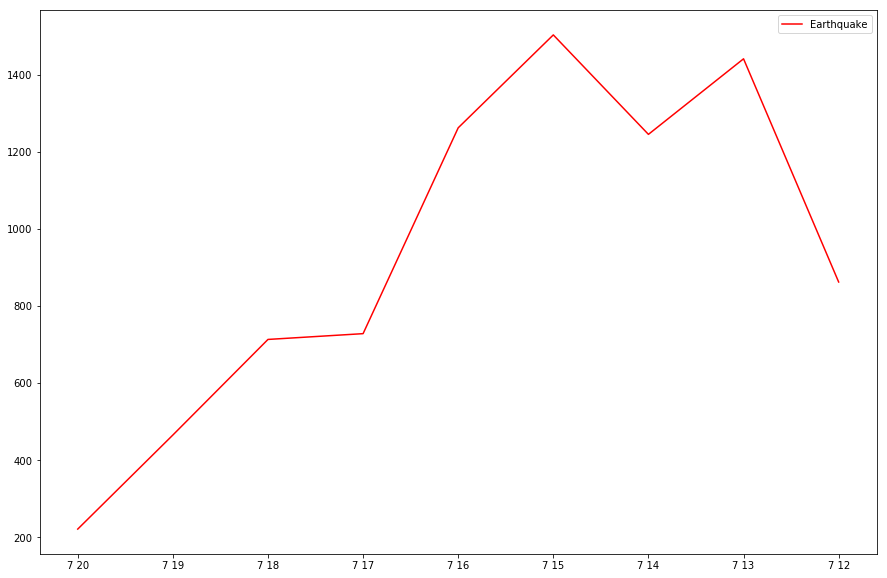

In [47]:
import matplotlib.pyplot as plt
import numpy as np

###below is the same code in earlier step###
query="earthquake"
count="100"
since="2018-02-04"
max_id='961335265041272832'
URL= ("https://api.twitter.com/1.1/search/tweets.json?q="+query+"&since="+since+"&max_id="+max_id+"&count="+count)

authen= ra.OAuth1(twitter_consumer_key,twitter_consumer_secret,twitter_access_token,twitter_access_secret)
backresponse=requests.get(URL,auth=authen)
tweetInformation=backresponse.json()

tweet_count_hour={}
tweet_hour={}
all_hour=[]
keywords=["Taiwan","taiwan"]
while (len(tweetInformation)!=0):
    #the try and except is just if something went wrong
    try:
        alltweets=tweetInformation["statuses"]
    except:
        print ("No data retrieved Run again after 15 minutes")
        
    for eachtweet in range(len(alltweets)):
        tweet = alltweets[eachtweet]["text"]
        #print(tweet)
        max_id=alltweets[eachtweet]["id_str"]
        #print(max_id)
        currentTime=alltweets[eachtweet]["created_at"][9:13]
        
        lang=alltweets[eachtweet]["lang"]
        if (lang=="en"):
            for word in keywords:
                if word in tweet:
                    if word in tweet:
                        #print("Filtered tweet : " +tweet)     
                        if currentTime in tweet_count_hour:
                            tweet_count_hour[currentTime]+=1 
                            tweet_hour[currentTime].append(tweet)
                        else:
                            tweet_count_hour[currentTime]=1
                            tweet_hour[currentTime]=[tweet]
                            all_hour.append(currentTime)
                        break
                    
   
    #print(tweet_hour)
    #print(tweet_count_hour)
    #print(all_hour)
    
    #print(alltweets[eachtweet]["created_at"])    
    URL= ("https://api.twitter.com/1.1/search/tweets.json?q="+query+"&since="+since+"&max_id="+max_id+"&count="+count)
    try:
        backresponse=requests.get(URL,auth=authen)
        tweetInformation=backresponse.json()
        alltweets=tweetInformation["statuses"]
    except:
        break
        
  ###########   Changes   ###############

#this variable is for saving all the tweets that occured in one hour into array
tweet_counts=[]
#these two variables are just for creating the x-axis ticks label from counter
tickcount=0
x_ax=[]
#this variable will save orignal time so that we can assign it to ticks
time_ticks=[]

#the time will be appended in backward way
for t in all_hour :
    #appending the value against each hour key 
    tweet_counts.append(tweet_count_hour[t])
    #for overwriting the xticks counter
    time_ticks.append(t)
     #appending counter to generate x-axis ticks
    x_ax.append(tickcount)
    tickcount+=1
    
plt.figure(figsize=(15,10))
#plotting the number of tweets in one hour against counter value
plt.plot(x_ax,  tweet_counts,label="Earthquake", c="red")
#changing the x-axis counter ticks into corresponding time 
plt.xticks(x_ax,all_hour)
#setting the figure size

#setting a legend for the label window
plt.legend()
#showing the graph
plt.show()
        

## Live Data from Twitter
we can get live data from twitter by using twitter-python api. the link is already given at the top. To do anything through Twitter api read the documentation http://python-twitter.readthedocs.io/en/latest/twitter.html

In [33]:
import twitter
#accessing the api class of twitter library. we pass our credentials for authentication
api= twitter.Api(twitter_consumer_key,twitter_consumer_secret,twitter_access_token,twitter_access_secret)
keywords=["Taiwan","taiwan","earthquake","Earthquake"]
#the GetStreamFilter method of api class return public real time tweets. for more information read the api documentation.
for eachtweet in api.GetStreamFilter(track=keywords):
    print(eachtweet)
    break

{'created_at': 'Thu Feb 08 22:18:06 +0000 2018', 'id': 961725854924472321, 'id_str': '961725854924472321', 'text': 'RT @QuakesToday: 5.0 magnitude #earthquake. 185 km from Panguna, Bougainville, #PapuaNewGuinea https://t.co/d92suxFRrn', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 24810442, 'id_str': '24810442', 'name': 'Nola Mostyn', 'screen_name': 'ncis38', 'location': 'United States', 'url': None, 'description': 'Christian Conservative', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 233, 'friends_count': 505, 'listed_count': 86, 'favourites_count': 7751, 'statuses_count': 41096, 'created_at': 'Tue Mar 17 01:03:06 +0000 2009', 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'lang': 'en', '

for getting the exact text we need to mention the "text" 

for more information consult the twitter api documentation

In [40]:
import twitter
api= twitter.Api(twitter_consumer_key,twitter_consumer_secret,twitter_access_token,twitter_access_secret)
keywords=["Trump","donald"]
for eachtweet in api.GetStreamFilter(track=keywords):
    print(eachtweet["text"])
    break

RT @FWResistance: @RenaRF @brianstelter Hope only qualifications are she’s pretty and she’s submissive. trump’s kind of woman.
None
